In [1]:
import prettyNEAT as pn
import domain
import numpy as np
import matplotlib.pyplot as plt
import PIL
import math
from collections import namedtuple

In [2]:
x=np.linspace(-3.9375,3.9375,32)
x= x.repeat(32)
x=x.reshape((32,32))
x=np.stack((x,x.transpose()),axis=2)
r=np.sqrt(np.square(x).sum(axis=2))
x=np.append(x,np.expand_dims(r,2),axis=2)

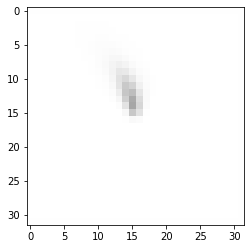

In [3]:
im = PIL.Image.open("goal0.png")
im1=im.convert("L").resize((32,32))
goal=np.array(im1)/255
goal=np.expand_dims(goal,2)
im.close()
plt.imshow(goal, cmap='Greys_r',vmin=0, vmax=1)

In [8]:
def getMyFitness(game, wVec, aVec, nRep=False,):
    if nRep is False:
        nRep = game.nReps
    wVec[np.isnan(wVec)] = 0
    reward = np.empty(nRep)
    for iRep in range(nRep):
        reward[iRep] = myTestInd(game, wVec, aVec)
    fitness = np.mean(reward)
    return fitness

def myTestInd(game, wVec, aVec):
    myPic = np.empty((32,32,1))      
    for i in range(game.maxEpisodeLength): 
        myPic[i%32][int(i/32)] = pn.act(wVec, aVec, game.nInput, game.nOutput, x[i%32][int(i/32)])
    return (np.square(goal-myPic).sum()-(32*32))/((-32*32))*100

In [5]:
Game = namedtuple('Game', ['env_name', 'time_factor', 'actionSelect',
  'input_size', 'output_size', 'layers', 'i_act', 'h_act',
  'o_act', 'weightCap','noise_bias','output_noise','max_episode_length','in_out_labels'])

game= Game(env_name='cppn',
  actionSelect='all', # all, soft, hard
  input_size=3,
  output_size=1,
  time_factor=0,
  layers=[25, 25],
  i_act=np.full(3,1),
  h_act=[1,3,4,10],
  o_act=np.full(1,6),
  weightCap = 25,
  noise_bias=0.0,
  max_episode_length = 32*32,
  output_noise=[False],
  in_out_labels = ['Pixel Intensity'])

In [6]:
hyp = domain.loadHyp(pFileName='C:\\Users\\mmkir\\Documents\\485\\indeptant study\\prettyNEAT\\config\\default_neat.json')
task = domain.GymTask(game, paramOnly=True, nReps=hyp['alg_nReps'])
hyp['ann_nInput']   = task.nInput
hyp['ann_nOutput']  = task.nOutput
hyp['ann_initAct']  = task.activations
hyp['ann_absWCap']  = task.absWCap
hyp['ann_mutSigma'] = task.absWCap * 0.2
hyp['ann_layers']   = task.layers
hyp['ann_actRange'] = task.actRange
neat = pn.Neat(hyp)

In [9]:
for gen in range(hyp['maxGen']):
    pop = neat.ask()
# Get newly evolved individuals from NEAT
    reward = np.empty(len(pop), dtype=np.float64)
    for i in range(len(pop)):
        task = domain.GymTask(game, paramOnly=True, nReps=hyp['alg_nReps'])
        wVec   = pop[i].wMat.flatten()
        aVec   = pop[i].aVec.flatten()
        reward[i] = getMyFitness(task, wVec, aVec) # process it
    neat.tell(reward)
    print(np.average(reward))

(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
9.467027347873149
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1